In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-2024/vehicles_dataset.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

data = pd.read_csv('/kaggle/input/vehicle-dataset-2024/vehicles_dataset.csv')

import seaborn as sns
import 

In [4]:
data.head()

,name,description,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,New,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,New,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,New,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,New,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,New,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   type            1002 non-null   object 
 5   year            1002 non-null   int64  
 6   price           979 non-null    float64
 7   engine          1000 non-null   object 
 8   cylinders       897 non-null    float64
 9   fuel            995 non-null    object 
 10  mileage         968 non-null    float64
 11  transmission    1000 non-null   object 
 12  trim            1001 non-null   object 
 13  body            999 non-null    object 
 14  doors           995 non-null    float64
 15  exterior_color  997 non-null    object 
 16  interior_color  964 non-null    object 
 17  drivetrain      1002 non-null   o

In [6]:
data.isnull().sum()

name                0
description        56
make                0
model               0
type                0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

In [7]:
data.drop(['description', 'name'], axis=1, inplace=True)

In [8]:
data.head()

,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,Jeep,Wagoneer,New,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,Jeep,Grand Cherokee,New,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,GMC,Yukon XL,New,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,Dodge,Durango,New,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,RAM,3500,New,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [9]:
data['model'].unique()

array(['Wagoneer', 'Grand Cherokee', 'Yukon XL', 'Durango', '3500',
       'Murano', 'F-350', 'Tucson Hybrid', 'Compass', 'Santa Cruz',
       'Blazer EV', 'Explorer', 'Taos', 'Jetta', 'Hornet', 'Tucson',
       'Terrain', 'Pacifica', '2500', 'Transit-250', 'Grand Cherokee 4xe',
       'EV6', 'Mustang Mach-E', 'Silverado 1500', 'Seltos', 'Blazer',
       'Wrangler', 'CX-90 PHEV', 'MDX', 'Outback', 'Atlas Cross Sport',
       'IONIQ 5', 'Q8 e-tron', 'Sonata Hybrid', 'EV9', 'Sportage Hybrid',
       'Expedition', 'Atlas', 'Grand Cherokee L', 'X7', 'Tundra Hybrid',
       'Kicks', 'Envista', 'Rogue', 'Wagoneer L', 'Sportage', 'EQE 350+',
       'Sonata', 'Ranger', 'SQ5', 'Q5 e', 'Charger', 'Sprinter 2500',
       'CR-V Hybrid', 'IONIQ 6', 'Transit-150', 'Santa Fe', 'Equinox',
       'Solterra', 'Wrangler 4xe', 'ProMaster 2500', 'Corsair',
       'Savana 2500', 'Pacifica Hybrid', 'ZDX', 'Altima', 'EQS 450',
       'ProMaster 3500', 'XT5', 'Gladiator', 'QX50', 'Versa',
       'AMG GLE 53', 

In [10]:
data['type'].unique()

array(['New'], dtype=object)

In [11]:
data['year'].unique()

array([2024, 2023, 2025])

In [12]:
data['cylinders'].unique()

array([ 6.,  8.,  4., nan,  3.,  0.])

In [13]:
data['doors'].unique()

array([ 4.,  3., nan,  2.,  5.])

In [14]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()


In [15]:
data.head()

,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,Jeep,Wagoneer,New,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,Jeep,Grand Cherokee,New,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,GMC,Yukon XL,New,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,Dodge,Durango,New,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,RAM,3500,New,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [16]:
columns_to_encode = ['make','model','type','year','engine','cylinders','fuel','transmission','trim','body','doors','exterior_color','interior_color','drivetrain']

In [17]:
label_encoders = {}

# Apply LabelEncoder to each column
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])



In [18]:
data.head()

,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,15,139,0,1,74600.0,23,3,4,10.0,19,148,6,2,257,35,1
1,15,56,0,1,50170.0,66,3,4,1.0,19,83,6,2,144,35,1
2,9,148,0,1,96410.0,48,4,4,0.0,32,50,6,2,236,82,1
3,7,29,0,0,46835.0,13,4,4,32.0,19,110,6,2,259,5,0
4,23,2,0,1,81663.0,19,3,0,10.0,9,80,5,2,207,5,1


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   make            1002 non-null   int64  
 1   model           1002 non-null   int64  
 2   type            1002 non-null   int64  
 3   year            1002 non-null   int64  
 4   price           979 non-null    float64
 5   engine          1002 non-null   int64  
 6   cylinders       1002 non-null   int64  
 7   fuel            1002 non-null   int64  
 8   mileage         968 non-null    float64
 9   transmission    1002 non-null   int64  
 10  trim            1002 non-null   int64  
 11  body            1002 non-null   int64  
 12  doors           1002 non-null   int64  
 13  exterior_color  1002 non-null   int64  
 14  interior_color  1002 non-null   int64  
 15  drivetrain      1002 non-null   int64  
dtypes: float64(2), int64(14)
memory usage: 125.4 KB


<Axes: >

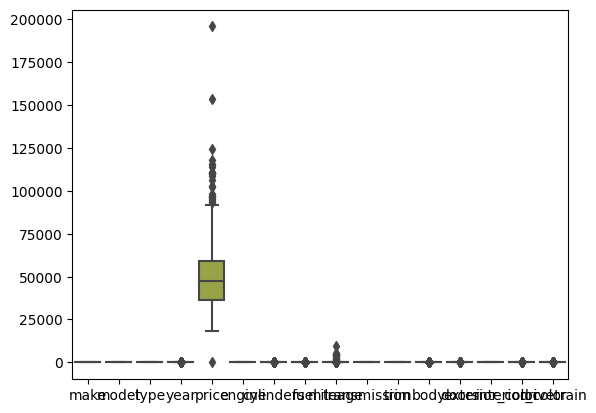

In [20]:
sns.boxplot(data)

<Axes: >

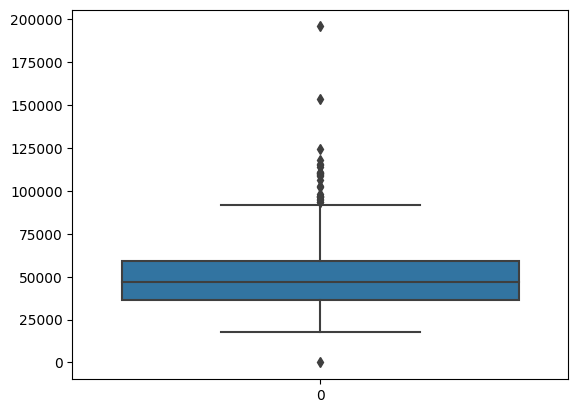

In [21]:
sns.boxplot(data['price'])

<Axes: >

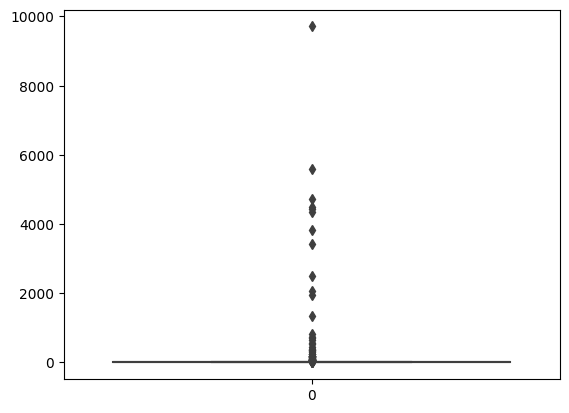

In [22]:
sns.boxplot(data['mileage'])

In [23]:
from sklearn.impute import KNNImputer
Knn = KNNImputer()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

from sklearn.model_selection import train_test_split


In [26]:
data['price'] = Knn.fit_transform(data[['price']])
data['mileage'] = Knn.fit_transform(data[['mileage']])

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   make            1002 non-null   int64  
 1   model           1002 non-null   int64  
 2   type            1002 non-null   int64  
 3   year            1002 non-null   int64  
 4   price           1002 non-null   float64
 5   engine          1002 non-null   int64  
 6   cylinders       1002 non-null   int64  
 7   fuel            1002 non-null   int64  
 8   mileage         1002 non-null   float64
 9   transmission    1002 non-null   int64  
 10  trim            1002 non-null   int64  
 11  body            1002 non-null   int64  
 12  doors           1002 non-null   int64  
 13  exterior_color  1002 non-null   int64  
 14  interior_color  1002 non-null   int64  
 15  drivetrain      1002 non-null   int64  
dtypes: float64(2), int64(14)
memory usage: 125.4 KB


In [28]:
x = data.drop(['price'],axis = 1)

In [29]:
y = data['price']

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [31]:
sc.fit(x_train)
x_train_sc = sc.transform(x_train)
sc.fit(x_test)
x_test_sc = sc.transform(x_test)

In [38]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [36]:
le = LinearRegression()
le.fit(x_train_sc,y_train)
y_pred = le.predict(x_test_sc)
r2_score(y_pred,y_test)

-1.2887291568990302

In [37]:
Re = RandomForestRegressor()
Re.fit(x_train_sc,y_train)
y_pred = Re.predict(x_test_sc)
r2_score(y_pred,y_test)

0.3929590712239448

In [41]:
de = DecisionTreeRegressor()
de.fit(x_train_sc,y_train)
y_pred = de.predict(x_test_sc)
r2_score(y_pred,y_test)


0.25166210514704

In [44]:
import xgboost as xgb
xgb.XGBRegressor(objective ='reg:squarederror', seed=42)
xg_reg.fit(x_train_sc,y_train)
y_pred = xg_reg.predict(x_test_sc)
r2_score(y_pred,y_test)

-1.0572508229217843

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=1200, learning_rate=0.1, random_state=42)
gb.fit(x_train_sc,y_train)
y_pred = gb.predict(x_test_sc)
r2_score(y_pred,y_test)

0.2835680301449439